In [1]:
import pandas as pd
import numpy as np
import csv
import sys
import os

df = pd.read_csv('dbworld_bodies.csv')

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[df.columns[0:4702]], df.CLASS, test_size=0.20, random_state=0)

# Naive Bayes Classifier

In [4]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [6]:
def plot_confusion_matrix(cm,class_,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function plots a confusion matrix
    """
    fig, ax = plt.subplots(figsize=(5, 5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(class_))
    plt.xticks(tick_marks, class_, rotation=90)
    plt.yticks(tick_marks, class_)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    plt.show()

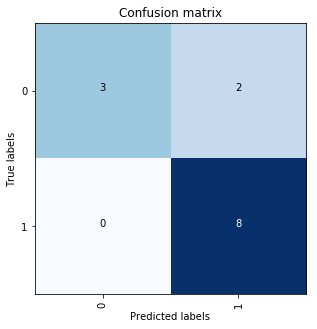

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

import itertools

plot_confusion_matrix(confusion_matrix(y_test, y_pred), ["0", "1"])

In [8]:
from sklearn.metrics import accuracy_score

print ("Accuracy Rate, which is calculated by accuracy_score() is: %f" % accuracy_score(y_test, y_pred))

Accuracy Rate, which is calculated by accuracy_score() is: 0.846154


In [9]:
from sklearn.metrics import classification_report
 
print("EVALUATION ON TESTING DATA")
print(classification_report(y_test, y_pred))

EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       1.00      0.60      0.75         5
          1       0.80      1.00      0.89         8

avg / total       0.88      0.85      0.84        13



# Rocchio Algorithm

In [10]:
from sklearn.neighbors.nearest_centroid import NearestCentroid


model = NearestCentroid(metric='euclidean')

model.fit(X_train, y_train)
 
# evaluate the model and update the accuracies list
score = model.score(X_test, y_test)
print("accuracy=%.2f%%" % (score * 100))

accuracy=76.92%


In [12]:
predictions = model.predict(X_test)
 
# show a final classification report demonstrating the accuracy of the classifier
# for each of the digits
print("EVALUATION ON TESTING DATA")
print(classification_report(y_test, predictions))

EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.75      0.60      0.67         5
          1       0.78      0.88      0.82         8

avg / total       0.77      0.77      0.76        13



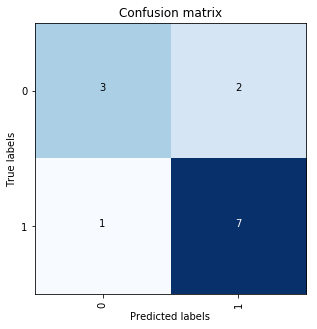

In [13]:
plot_confusion_matrix(confusion_matrix(y_test, predictions), ["0", "1"])

# K Nearest Neighbor Classifier

In [15]:
from sklearn.neighbors import KNeighborsClassifier

for k in range(1, 30, 2):
    model = KNeighborsClassifier(n_neighbors=k, weights='distance')

    model.fit(X_train, y_train)
 
    # evaluate the model and update the accuracies list
    score = model.score(X_test, y_test)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))

k=1, accuracy=38.46%
k=3, accuracy=38.46%
k=5, accuracy=38.46%
k=7, accuracy=38.46%
k=9, accuracy=38.46%
k=11, accuracy=38.46%
k=13, accuracy=38.46%
k=15, accuracy=38.46%
k=17, accuracy=38.46%
k=19, accuracy=38.46%
k=21, accuracy=38.46%
k=23, accuracy=38.46%
k=25, accuracy=38.46%
k=27, accuracy=38.46%
k=29, accuracy=38.46%


In [16]:
from sklearn.metrics import classification_report

# re-train our classifier using the best k value and predict the labels of the
# test data
model = KNeighborsClassifier(n_neighbors=9)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
 
# show a final classification report demonstrating the accuracy of the classifier
# for each of the digits
print("EVALUATION ON TESTING DATA")
print(classification_report(y_test, predictions))

EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       0.38      1.00      0.56         5
          1       0.00      0.00      0.00         8

avg / total       0.15      0.38      0.21        13



/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


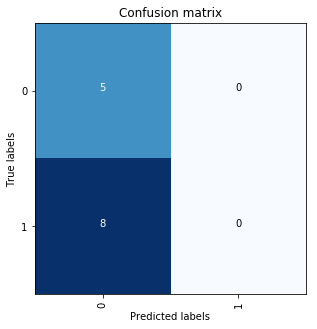

In [17]:
plot_confusion_matrix(confusion_matrix(y_test, predictions), ["0", "1"])

In [18]:
X_train

,000euro,05102011,10th,11th,12noon,12th,13th,14th,15th,16th,...,ziyang,znie,zurich,zürich,ètop,özsu,û37,û42,û46,û56
28,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
54,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
df

,000euro,05102011,10th,11th,12noon,12th,13th,14th,15th,16th,...,znie,zurich,zürich,ètop,özsu,û37,û42,û46,û56,CLASS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
